In [25]:
# Dependencies
import numpy as np
import pandas as pd

# Dependencies for MatPlotLib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [28]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
jun_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6)
# print(june_temps.all())

In [29]:
# 2. Convert the June temperatures to a list.
jun_temps_aslist = [temp.tobs for temp in jun_temps]

In [30]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
jun_temps_df = pd.DataFrame(jun_temps_aslist, columns=["June Temperatures"])

In [31]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_temps_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [32]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [33]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

In [34]:
# 7. Convert the December temperatures to a list.
dec_temps_aslist = [temp.tobs for temp in dec_temps]

In [35]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_aslist, columns=["December Temperatures"])

In [36]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [37]:
# 10. Return to your challenge instructions to compare your summary statistics

In [43]:
# Additional queries created to compare data from specific location for both June and Dec
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

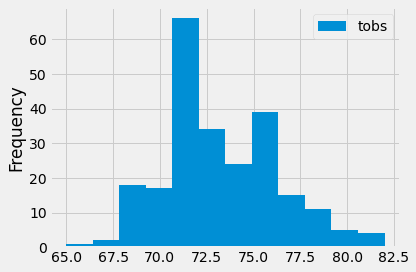

In [41]:
# Focus on data collected from station "USC00519281" for Jun
jun_temps = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date) == 6).all()
# print(results)

df = pd.DataFrame(jun_temps, columns=['tobs'])
# print(df)
df.plot.hist(bins=12)
plt.tight_layout()

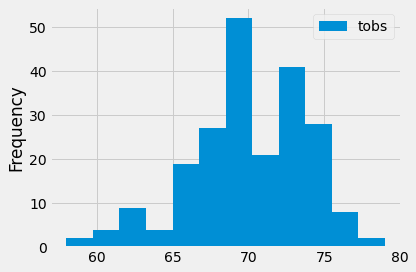

In [42]:
# Focus on data collected from station "USC00519281" for Dec
dec_temps = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(extract('month', Measurement.date) == 12).all()
# print(results)

df = pd.DataFrame(dec_temps, columns=['tobs'])
# print(df)
df.plot.hist(bins=12)
plt.tight_layout()